# Project 1: Investigating a Dataset - TMDB dataset


<a href="#intro">Introduction</a><br>
<a href="#wran">Data Wrangling</a><br>
<a href="#eda">Exploratory Data Analysis</a><br>
<a href="#con">Conclusion</a><br>
<a href="#lim">Limitations</a>

<a id='intro'></a>
## Introduction 

TMDB Movies dataset contains about 10 000 movies collected from the TMDB dataset. It has 21 columns and about 10 800 entries. 

-  Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.


## Question(s) for Analysis

1. 20 most popular movies

2. which actor appeared in many movies

3. Is there a correlation between budget and revenue 
4. Which movie genre generated the most revenue


In [103]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#using google colab notebooks
#mounting data from the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the data set using pandas
movies_df = pd.read_csv('/content/drive/My Drive/tmdb-movies.csv')
movies_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [ ]:
#checking the general information on the data
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id="wran"></a>
# Data Wrangling


### Data Cleaning


In [ ]:

#droping columns which are not going to form part of this analysis

movies_df.drop(['vote_count','tagline','id','budget_adj','revenue_adj',
                'vote_average',
                'overview','homepage', 'keywords', 'production_companies',
                'imdb_id', 'director','release_date',],axis=1,inplace=True)


In [ ]:
#droping every null value
movies_df.dropna(axis=0, how='any', inplace=True)


In [ ]:
#droping duplicated rows if any
movies_df.drop_duplicates(keep='first',inplace=True)

In [ ]:
#creating a custom made explode to explode column: cast and genres
def explode(x, col): return x.assign(**{col:x[col].str.split("|")}).explode(col)

movies_df = explode(explode(movies_df,'cast' ), 'genres')

In [ ]:
#changing columns cast, original_title and genres to be of type string
movies_df['cast'] = movies_df['cast'].astype("string")
movies_df['genres'] = movies_df['genres'].astype("string")
movies_df['original_title'] = movies_df['original_title'].astype("string")



<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 20 most popular movies

In [ ]:
#creating a dataframe contain columns: popularity and original title of the movie
df_m = movies_df[['popularity','original_title']]

# droping the duplicates values from the dataframe
df_m = df_m.drop_duplicates(keep='first')


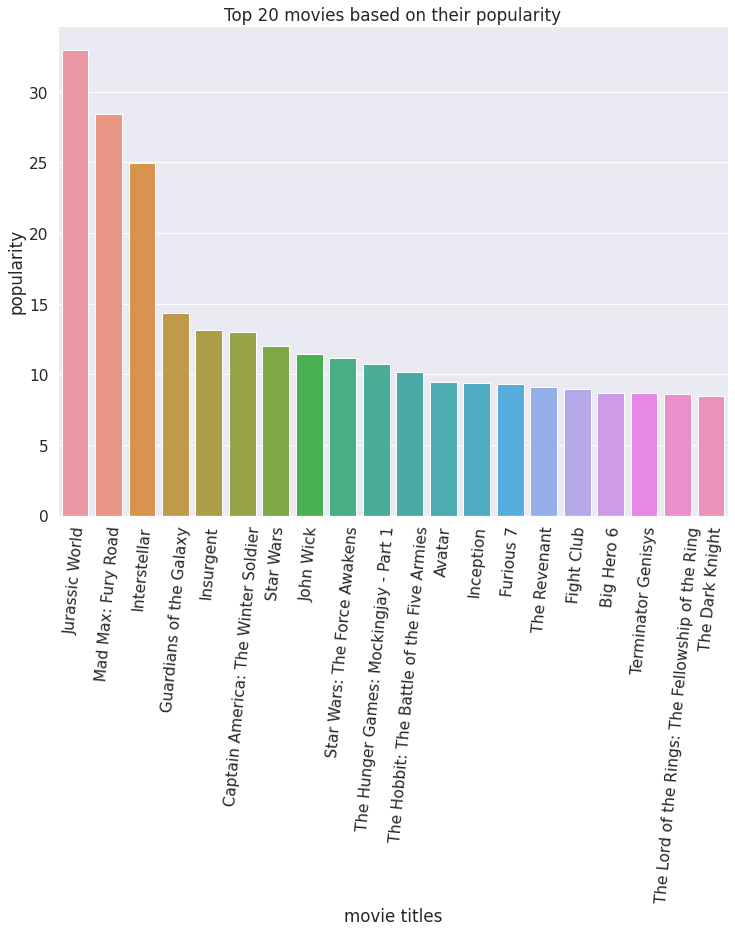

In [104]:
# 20 popular movies 
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)


ax = sns.barplot(
    df_m.sort_values(by="popularity", ascending=False).head(20).original_title, 
    df_m.sort_values(by="popularity", ascending=False).head(20).popularity)


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='movie titles', ylabel='popularity',
       title = 'Top 20 movies based on their popularity')
plt.show();

**from the bar plot above we can see that *JURASTIC WORLD* was the most popular movie in the dataset.**

### Research Question 2  Which actor appeared in most movies

In [105]:
#creating a dataframe containing cast and original_title columns
df_actors = movies_df[['cast', 'original_title'] ]

#removing any duplicates in the dataset
df_actors = df_actors.drop_duplicates(keep='first')

#creating a dataframe that contains value_counts of df_actors dataframe
df_actors = pd.DataFrame(df_actors['cast'].value_counts())
df_actors = df_actors.reset_index()
df_actors.columns = ['actors', 'counts']

#taking only 20 actors from the dataframe for our analysis
df_actors = df_actors.head(20)
df_actors.head()

,actors,counts
0,Robert De Niro,72
1,Samuel L. Jackson,71
2,Bruce Willis,62
3,Nicolas Cage,61
4,Michael Caine,52


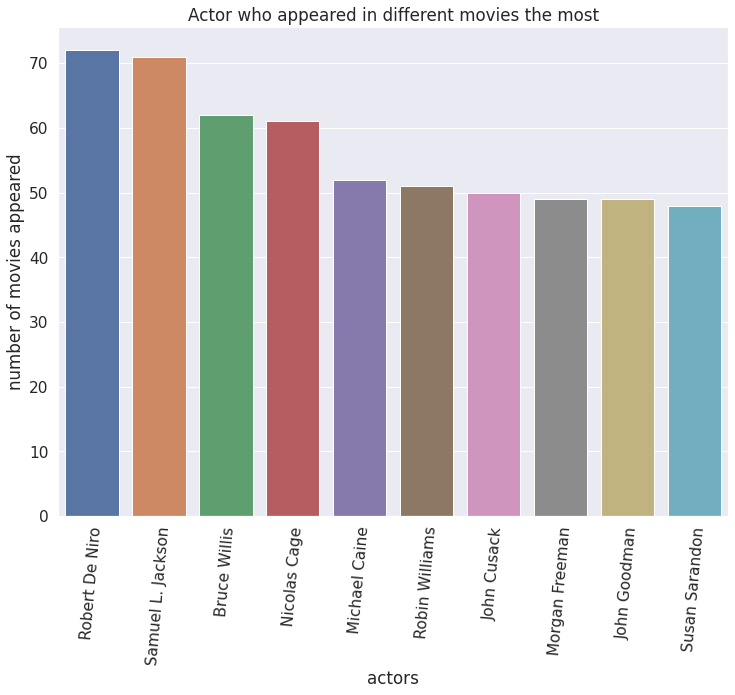

In [107]:
#ploting a bar chat of the 10 actors that appear in most movies

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)


ax = sns.barplot(
   df_actors.actors.head(10), df_actors.counts.head(10))


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='actors', ylabel='number of movies appeared', 
       title = 'Actor who appeared in different movies the most')
plt.show()

**From the above we can note that *Robert De Niro* appeared in most movies.**


## Question 3: Is there a correlation between budget and revenue 


In [ ]:
movies_df.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,124,Action,2015
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,124,Adventure,2015
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,124,Science Fiction,2015
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,124,Thriller,2015
0,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,124,Action,2015


In [108]:
#creating a dataframe of revenue_adj and budjet_adj
df_bud = movies_df[['revenue', 'budget']]
df_bud = df_bud.drop_duplicates(keep='first')

#creating a dataframe of budget columns and popularity columns
df_pop = movies_df[['popularity', 'budget']]
df_pop = df_pop.drop_duplicates(keep='first')

In [109]:
#creating a function for scatter plot
def scatter_plotting(x_series, y_series, plot_title, x_label, y_label):
  sns.scatterplot(x=x_series, y=y_series)
  plt.title(plot_title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show();


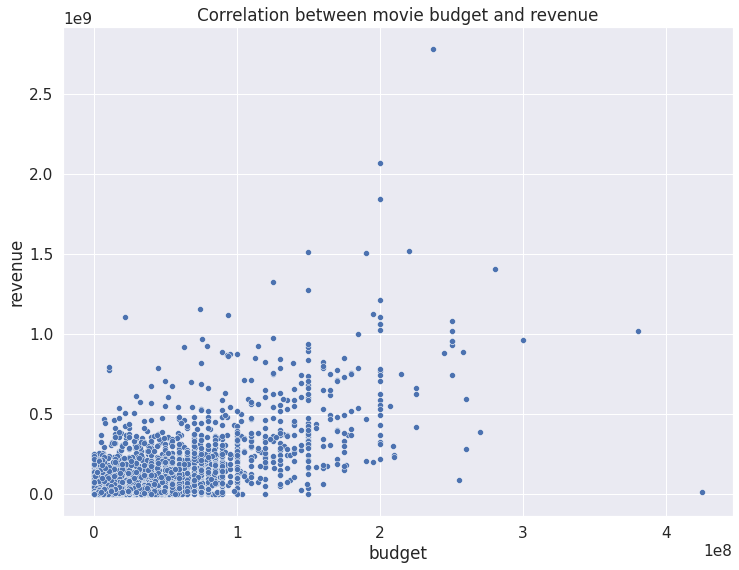

In [110]:
#creating a scatter to see if there is a correlation between revenue_adj and budjet_adj
title = 'Correlation between movie budget and revenue'
x_label = 'budget'
y_label = 'revenue'
scatter_plotting(df_bud.budget, df_bud.revenue,title, x_label, y_label)

We can note that there is a positive correlation between money spend on the movie(budget) and the revenue that the movie gets.

###Question 3 part 2 correlation between revenue and popularity

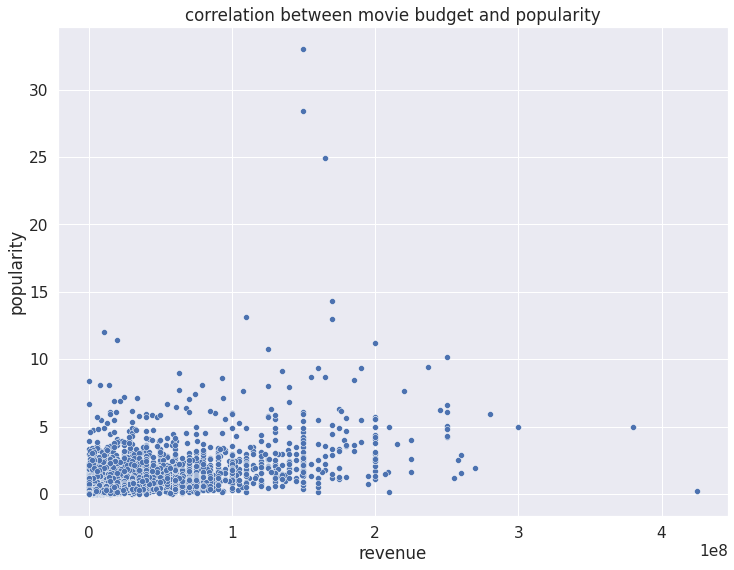

In [111]:
# scatter plot between budget and popularity of the moves
title = 'correlation between movie budget and popularity'
x_label = 'revenue'
y_label = 'popularity'
scatter_plotting(df_pop.budget, df_pop.popularity, title, x_label, y_label)

we constat that there isn't really not correlation between revenue of the movies and how popular the movie is. So we can safely say the amount of money that the movies invest isn't correlated to how the movie will be popular

##Question 4: Which movie genre produced the most revenue

In [112]:
#creating a dataframe of movie genre and revenue
df_gen = movies_df[['revenue', 'genres']]
df_gen = df_gen.drop_duplicates()



In [113]:
df_gen.revenue.values.reshape(-1, 1)

array([[1513528810],
       [1513528810],
       [1513528810],
       ...,
       [   6000000],
       [  20000000],
       [  12000000]])

In [114]:
#collecting all movie genres
genres = np.array(df_gen['genres'].unique())
for genre in genres:
  genre = genre.strip()

genres

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [115]:
#scaling data
from sklearn import preprocessing

def vectorized_array(df):
  #vectorized operation across numpy array
  float_array = df.values.astype(float).reshape(-1, 1)
  min_max_scaler = preprocessing.MinMaxScaler()
  scaled_array = min_max_scaler.fit_transform(float_array)
  return scaled_array

In [116]:
#returning scaled data to revenue column
df_gen.revenue = vectorized_array(df_gen.revenue)
df_gen.head()

,revenue,genres
0,0.544140,Action
0,0.544140,Adventure
0,0.544140,Science Fiction
0,0.544140,Thriller
1,0.136054,Action


In [118]:

#creating a dictionary to hold total revenue for each movie genre

def apply_ensure_sum(genre,df_gen):
  genre = str(genre)
  #sum of each genre
  sum_value = np.sum( np.array(df_gen[ df_gen['genres'] == genre ].revenue) )
  return sum_value


In [119]:

gen_values = []
for genre in genres:
  sum_genre = apply_ensure_sum(genre, df_gen)
  gen_values.append(sum_genre)


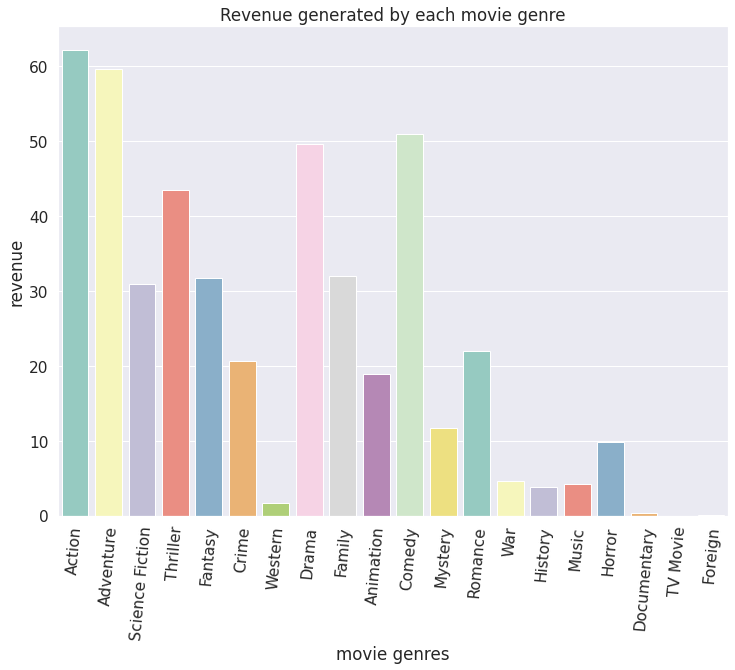

In [120]:
#creating a bar plot for revenue and movie genre
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)
ax = sns.barplot(genres, gen_values, palette="Set3")

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    
ax.set(xlabel='movie genres', ylabel='revenue', 
       title = 'Revenue generated by each movie genre')
plt.show();

We can note that Action movies generated more movies that any other movie genre, followed by Adventure movies and then Science Fiction.

<a id='con'><a>
# Conclusion

The TMDB movie data was quiet clean that there wasn't much effort need to work on it. They were null values which  i had to remove for my analysis know that they werent going to affect my analysis too much. 

I had to work more the two columns genres and cast which had a pipe after every genre or cast. I had to seperate the cast so that I can be able to answer my question which is which actor appeared in my movies along the course.

From this data I was able to find which actor featured in a lot of movies, I was able to find if there is a correlation between the movie budget and its return. I noticed that there was no correlation. I also used this data to find which was the most popular movie and if popularity was equated with the revenue the movie was earning but I found that there was no correlation between these two.



<a id='lim'></a>
# Limitations

The challenges I faced working with this data was It was difficult to know the meaning of each columns. For example the column popularity what was the values there meaning. Did they mean the popularity of the movies for a day accumulated to a year or they meant something. 

Had the data included a file that explains the meaning of each column it would have been helpful.